In [102]:
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import itertools as it
from collections import Counter
import nltk

In [2]:
origo_data = joblib.load('origo_enhanced_df.pkl')

In [5]:
origo_data['migrans_title'] = origo_data['article_title_stemmed'].apply(
    lambda x: 1 if any('migrán' in item for item in x) else 0)

# 1. Title Analysis

## 1.1 Occurrence of immigrants in article titles

In [11]:
migrans_freq = origo_data.groupby(['year', 'month', 'day'])['migrans_title'].mean().to_frame()
migrans_freq = migrans_freq.reset_index()

Text(0.5,1,"Average count of article titles containing 'immigrants' in 2018")

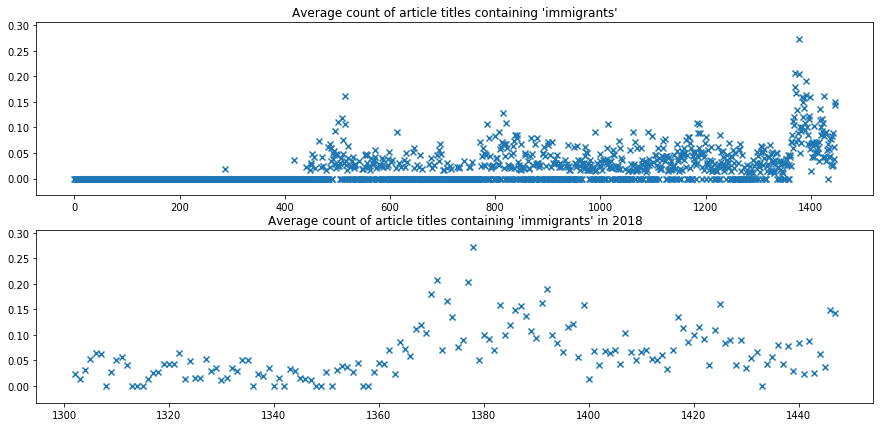

In [12]:
x = migrans_freq.index
y = migrans_freq['migrans_title']
fig, (ax_all, ax_18) = plt.subplots(figsize=(15,7), nrows=2, ncols=1,)
ax_all.scatter(x=x, y=y, marker='x', edgecolor='b')
ax_all.set_title("Average count of article titles containing 'immigrants'")

migrans_freq_18 = migrans_freq[migrans_freq['year'] == 2018]
x = migrans_freq_18.index
y = migrans_freq_18['migrans_title']
ax_18.scatter(x=x, y=y, marker='x', edgecolor='b')
ax_18.set_title("Average count of article titles containing 'immigrants' in 2018")

## 1.2 Frequency of author-less articles

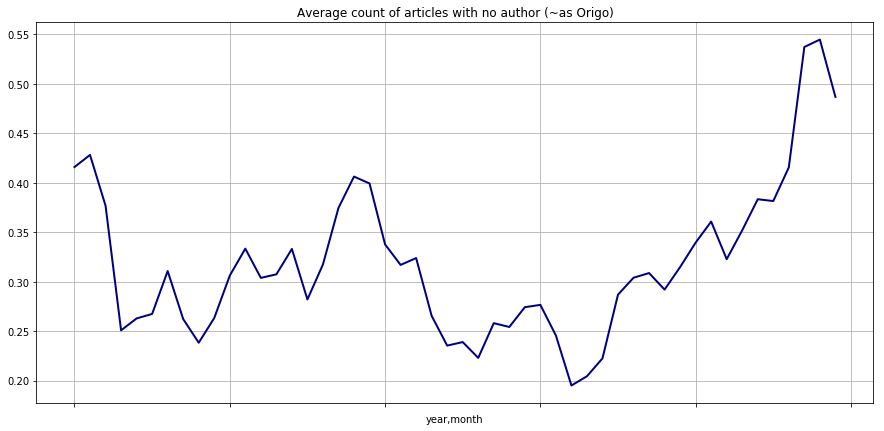

In [13]:
origo_authless_freq = origo_data.groupby(['year', 'month'])['author_isOrigo'].mean()

origo_authless_freq.plot(lw=2,
             colormap='jet',
             title='Average count of articles with no author (~as Origo)',
             figsize=(15,7))
plt.grid()
plt.show()

### 1.3 Most common words in titles

In [155]:
origo_authless_titles = origo_data.groupby(['year'])['article_title_stemmed'].apply(list).to_frame().reset_index()

In [156]:
type(origo_authless_titles['article_title_stemmed'][1])

list

In [157]:
# flatten list of words
origo_authless_titles['article_title_stemmed'] = origo_authless_titles['article_title_stemmed'].apply(
    lambda x: list(it.chain.from_iterable(list(x))))

# remove words under length of 3
origo_authless_titles['article_title_stemmed'] = origo_authless_titles['article_title_stemmed'].apply(
    lambda x: [word for word in x if len(word)>2])

In [158]:
origo_authless_titles['article_title_freq'] = origo_authless_titles['article_title_stemmed'].apply(
    lambda x: Counter(x).most_common(10))

In [159]:
origo_authless_titles

,year,article_title_stemmed,article_title_freq
0,2014,"[főiskol, fizetés, kap, egyetem, végzettségű, ...","[(miat, 302), (orb, 285), (nem, 259), (magyar,..."
1,2015,"[áder, jános, nyújts, kez, egymás, zen, rezsic...","[(orb, 529), (miat, 428), (magyar, 365), (nem,..."
2,2016,"[ünnep, besze, könnyű, műfaj, áder, szeret, ir...","[(miat, 360), (férf, 293), (áll, 274), (ember,..."
3,2017,"[tűzes, petárda, tűzijáték, miat, háromezersze...","[(miat, 700), (férf, 529), (ember, 522), (magy..."
4,2018,"[áder, jános, sötétség, hely, villanyoszlop, ü...","[(migráns, 500), (autó, 495), (miat, 312), (fé..."


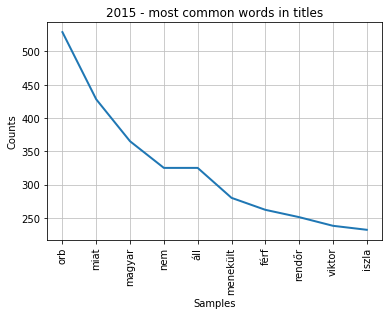

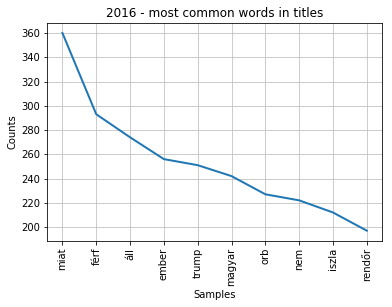

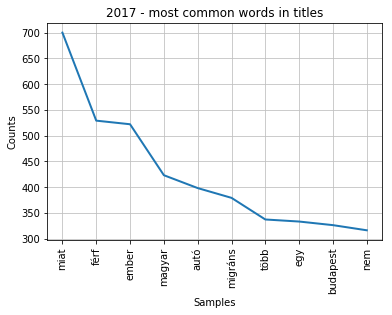

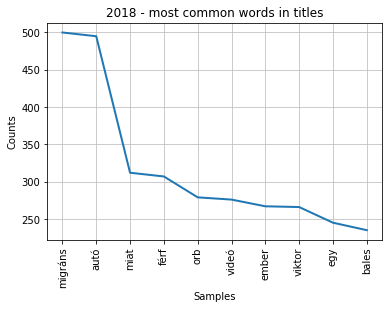

In [160]:
fd = nltk.FreqDist(origo_authless_titles['article_title_stemmed'][1])
fd.plot(10, title='2015 - most common words in titles')
fd = nltk.FreqDist(origo_authless_titles['article_title_stemmed'][2])
fd.plot(10, title='2016 - most common words in titles')
fd = nltk.FreqDist(origo_authless_titles['article_title_stemmed'][3])
fd.plot(10, title='2017 - most common words in titles')
fd = nltk.FreqDist(origo_authless_titles['article_title_stemmed'][4])
fd.plot(10, title='2018 - most common words in titles')